In [1]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [2]:
import torch.nn.functional as F

In [3]:
n_data = torch.ones(100,2)

In [4]:
n_data = torch.ones(100, 2)      
x0 = torch.normal(2*n_data, 1)      
y0 = torch.zeros(100)               
x1 = torch.normal(-2*n_data, 1)     
y1 = torch.ones(100)                

In [5]:
x = torch.cat((x0,x1),0).type(torch.FloatTensor)
y = torch.cat((y0,y1)).type(torch.LongTensor)

In [6]:
x,y= Variable(x),Variable(y)

# Method 1

In [7]:
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden=torch.nn.Linear(n_feature,n_hidden)
        self.out=torch.nn.Linear(n_hidden,n_output)
        
    def forward(self,x):
        x=F.relu(self.hidden(x))
        x=F.softmax(self.out(x))
        return x

In [8]:
net = Net(n_feature=2, n_hidden=10, n_output=2) 

In [9]:
loss_func = torch.nn.CrossEntropyLoss()

In [14]:
optimizer = torch.optim.SGD(net.parameters(),lr=0.3)

In [15]:
# Use sequential method to create the models

/Users/edwin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


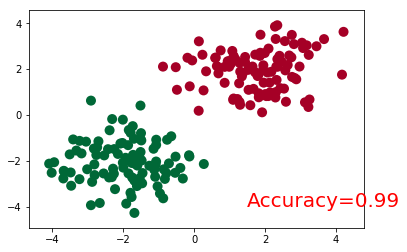

In [22]:
plt.ion() 
plt.show()
for t in range(200):
    out=net(x)
    loss = loss_func(out,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t % 2 == 0:
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.0
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()  
plt.show()

In [26]:
# Save Model

In [23]:
torch.save(net,'net.pkl')

/Users/edwin/anaconda/lib/python2.7/site-packages/torch/serialization.py:158: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [25]:
# Save parameters

In [24]:
torch.save(net.state_dict(),'net_params.pkl')

# Load Model

In [27]:
net2=torch.load('net.pkl')

In [41]:
prediction=torch.max(net2(x),1)[1].data.numpy()

/Users/edwin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


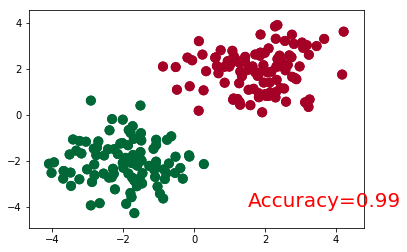

In [43]:
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=prediction, s=100, lw=0, cmap='RdYlGn')
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
accuracy = sum(prediction == target_y)/200.0
plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
plt.pause(0.1)

In [44]:
#Load Parameters

In [53]:
net3=torch.nn.Sequential(
    torch.nn.Linear(2,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,2),
    torch.nn.Softmax()
)

In [54]:
optimizer=torch.optim.SGD(net3.parameters(),lr=0.2)

/Users/edwin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


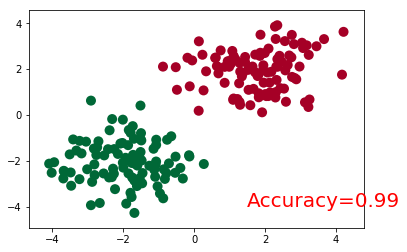

In [55]:
plt.ion() 
plt.show()
for t in range(200):
    out=net2(x)
    loss = loss_func(out,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t % 2 == 0:
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.0
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()  
plt.show()

In [56]:
torch.save(net3.state_dict(),'net3_param.pkl')

In [57]:
temp=torch.load('net3_param.pkl')

In [59]:
net4=torch.nn.Sequential(
    torch.nn.Linear(2,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,2),
    torch.nn.Softmax()
)

In [62]:
net4.load_state_dict(torch.load('net3_param.pkl'))

# Take Away:
There are two ways to save the model: Either save the model or save the paramters.
To load the parameters, need to make sure the network is constructed in the exact same way. Meaning, either from the 
class construction or by sequential method. 